Image classification Fashion Mnist

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
print(f"Training sample :\n{train_data[0]}\n")
print(f"Training label :\n{train_labels[0]}\n")

Training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

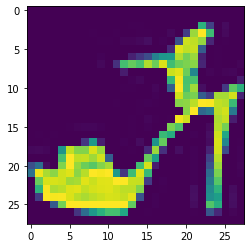

In [6]:
plt.imshow(train_data[9]);

In [7]:
train_labels[7]

2

In [4]:
class_names= ["T-shirt/top","Trouser","pullover","Dress", "coat", "sandal","shirt", "sneaker", "bag", "ankle boot"]

In [9]:
len(class_names)

10

Text(0.5, 1.0, 'Dress')

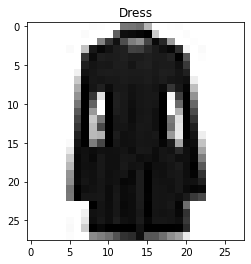

In [10]:
index_of_choice = 508
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

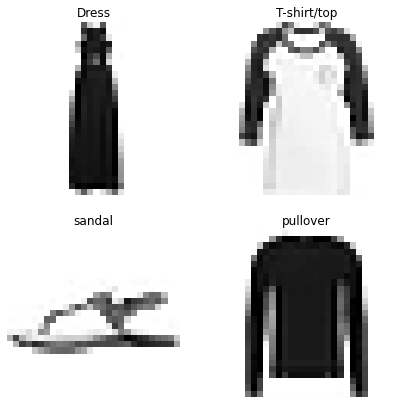

In [11]:
import random
plt.figure(figsize=(7,7))
for i in range (4):
    ax = plt.subplot(2,2,i+1)
    rand_index= random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [16]:
train_data[0].shape

(28, 28)

In [17]:
train_data.min(), train_data.max()

(0, 255)

In [18]:
train_data_norm= train_data/255.0
test_data_norm= test_data/255.0

In [19]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

Machine learning algorithm- mo

In [ ]:


tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),z
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(15, activation= "relu"),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

In [63]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer= tf.keras.optimizers.Adam(lr=0.001),
             metrics=["accuracy"])

In [64]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epochs/20))

In [65]:
norm_history= model.fit(train_data_norm,train_labels, 
                            epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8779 - accuracy: 0.7023
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4320 - accuracy: 0.8465
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4048 - accuracy: 0.8540
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8657
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3720 - accuracy: 0.8665
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3620 - accuracy: 0.8704
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3469 - accuracy: 0.8749
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.8775
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3424 - accuracy: 0.8750
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.330

In [66]:
test_loss, test_accuracy = model.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3949 - accuracy: 0.8618


In [67]:
print('\nTest loss:{0:.2f}, Test accuracy:{1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss:0.39, Test accuracy:86.18%
